1.Padronizar a coluna &#39;categoria&#39; para minúsculas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
vendas = "vendas.xlsx"
df = pd.read_excel(vendas)
# print(df.head())
print(df.columns)

Index(['data', 'loja', 'categoria', 'produto', 'quantidade', 'valor_venda'], dtype='object')


1.Padronizar a coluna &#39;categoria&#39; para minúsculas.

In [2]:
df['categoria'] = df['categoria'].str.lower()

print(df)

          data         loja         categoria          produto  quantidade  \
0   2024-07-20  Vento Norte  eletrodomesticos        Aquecedor         5.0   
1   2024-05-30  Vento Norte           sazonal     Guarda-chuva         6.0   
2   2024-01-25  Vento Norte            roupas            Calça         8.0   
3   2024-07-10  Chuva Clara            roupas           Casaco         5.0   
4   2024-05-29    Porto Sol          infantil   Blusa Infantil         NaN   
..         ...          ...               ...              ...         ...   
495 2024-08-23    Porto Sol  eletrodomesticos       Ventilador         4.0   
496 2024-12-19  Vento Norte  eletrodomesticos       Ventilador         1.0   
497 2024-05-12    Vila Neve          infantil   Blusa Infantil         6.0   
498 2024-03-08    Vila Neve  eletrodomesticos  Ar-condicionado         1.0   
499 2024-07-25  Vento Norte           sazonal     Guarda-chuva         3.0   

     valor_venda  
0         405.55  
1        2866.20  
2     

2.Remover registros onde a quantidade está ausente

In [3]:
df.dropna()

,data,loja,categoria,produto,quantidade,valor_venda
0,2024-07-20,Vento Norte,eletrodomesticos,Aquecedor,5.0,405.55
1,2024-05-30,Vento Norte,sazonal,Guarda-chuva,6.0,2866.20
2,2024-01-25,Vento Norte,roupas,Calça,8.0,3292.72
3,2024-07-10,Chuva Clara,roupas,Casaco,5.0,1294.95
5,2024-08-31,Porto Sol,sazonal,Manta térmica,2.0,957.96
...,...,...,...,...,...,...
495,2024-08-23,Porto Sol,eletrodomesticos,Ventilador,4.0,1545.72
496,2024-12-19,Vento Norte,eletrodomesticos,Ventilador,1.0,230.89
497,2024-05-12,Vila Neve,infantil,Blusa Infantil,6.0,441.30
498,2024-03-08,Vila Neve,eletrodomesticos,Ar-condicionado,1.0,293.93


3. Remover espaços extras e padronizar com primeira letra maiúscula (estilo título)

In [4]:
df.columns = df.columns.str.title()

df['Categoria'] = df['Categoria'].str.strip()
df['Loja'] = df['Loja'].str.strip()
df['Produto'] = df['Produto'].str.strip()

4. Garantir que a coluna data seja datetime

In [5]:
df['Data'] = pd.to_datetime(df['Data'], format='datetime64')

print(df.dtypes)

Data           datetime64[ns]
Loja                   object
Categoria              object
Produto                object
Quantidade            float64
Valor_Venda           float64
dtype: object


6. Calcular valor médio unitário por produto (sem considerar nulos)

In [6]:
df['Valor Unitario'] = df['Valor_Venda'] / df['Quantidade']

print(df)

          Data         Loja         Categoria          Produto  Quantidade  \
0   2024-07-20  Vento Norte  eletrodomesticos        Aquecedor         5.0   
1   2024-05-30  Vento Norte           sazonal     Guarda-chuva         6.0   
2   2024-01-25  Vento Norte            roupas            Calça         8.0   
3   2024-07-10  Chuva Clara            roupas           Casaco         5.0   
4   2024-05-29    Porto Sol          infantil   Blusa Infantil         NaN   
..         ...          ...               ...              ...         ...   
495 2024-08-23    Porto Sol  eletrodomesticos       Ventilador         4.0   
496 2024-12-19  Vento Norte  eletrodomesticos       Ventilador         1.0   
497 2024-05-12    Vila Neve          infantil   Blusa Infantil         6.0   
498 2024-03-08    Vila Neve  eletrodomesticos  Ar-condicionado         1.0   
499 2024-07-25  Vento Norte           sazonal     Guarda-chuva         3.0   

     Valor_Venda  Valor Unitario  
0         405.55           8

7. Agrupar e calcular média

In [7]:
df.groupby('Produto')['Valor_Venda'].mean().round(2)

Produto
Aquecedor          1185.67
Ar-condicionado    1406.21
Blusa Infantil     1428.06
Calça              1733.81
Camiseta           1374.57
Casaco             1254.18
Guarda-chuva       1380.07
Lancheira          1193.75
Manta térmica      1280.74
Mochila            1872.34
Protetor Solar     1777.38
Ventilador         1552.91
Vestido            1935.47
Name: Valor_Venda, dtype: float64

In [8]:
df.groupby('Produto')['Valor Unitario'].mean().round(2)

Produto
Aquecedor          209.27
Ar-condicionado    285.40
Blusa Infantil     290.07
Calça              266.70
Camiseta           253.66
Casaco             281.15
Guarda-chuva       265.00
Lancheira          271.68
Manta térmica      261.93
Mochila            303.51
Protetor Solar     299.16
Ventilador         287.49
Vestido            298.54
Name: Valor Unitario, dtype: float64

8. Preencher valor_unitario ausente

In [9]:
media = df['Valor Unitario'].mean()
df['Valor Unitario'].fillna(media) 

0       81.110000
1      477.700000
2      411.590000
3      258.990000
4      274.675929
          ...    
495    386.430000
496    230.890000
497     73.550000
498    293.930000
499    493.270000
Name: Valor Unitario, Length: 500, dtype: float64

9. Recalcular valor_venda

In [10]:
df['Recalculo'] = df['Valor Unitario'] * df['Quantidade']

print(df)

          Data         Loja         Categoria          Produto  Quantidade  \
0   2024-07-20  Vento Norte  eletrodomesticos        Aquecedor         5.0   
1   2024-05-30  Vento Norte           sazonal     Guarda-chuva         6.0   
2   2024-01-25  Vento Norte            roupas            Calça         8.0   
3   2024-07-10  Chuva Clara            roupas           Casaco         5.0   
4   2024-05-29    Porto Sol          infantil   Blusa Infantil         NaN   
..         ...          ...               ...              ...         ...   
495 2024-08-23    Porto Sol  eletrodomesticos       Ventilador         4.0   
496 2024-12-19  Vento Norte  eletrodomesticos       Ventilador         1.0   
497 2024-05-12    Vila Neve          infantil   Blusa Infantil         6.0   
498 2024-03-08    Vila Neve  eletrodomesticos  Ar-condicionado         1.0   
499 2024-07-25  Vento Norte           sazonal     Guarda-chuva         3.0   

     Valor_Venda  Valor Unitario  Recalculo  
0         405.55 

10. Salvar o novo DataFrame limpo em um novo arquivo Excel

In [11]:
df.to_excel("Archanjo_Tratado.xlsx")

In [12]:
df_analise = pd.read_excel("Archanjo_Tratado.xlsx")

print(df_analise.head())

   Unnamed: 0       Data         Loja         Categoria         Produto  \
0           0 2024-07-20  Vento Norte  eletrodomesticos       Aquecedor   
1           1 2024-05-30  Vento Norte           sazonal    Guarda-chuva   
2           2 2024-01-25  Vento Norte            roupas           Calça   
3           3 2024-07-10  Chuva Clara            roupas          Casaco   
4           4 2024-05-29    Porto Sol          infantil  Blusa Infantil   

   Quantidade  Valor_Venda  Valor Unitario  Recalculo  
0         5.0       405.55           81.11     405.55  
1         6.0      2866.20          477.70    2866.20  
2         8.0      3292.72          411.59    3292.72  
3         5.0      1294.95          258.99    1294.95  
4         NaN          NaN             NaN        NaN  


1. Total de vendas por loja - Agrupar por loja e somar o valor total vendido

In [13]:
venda_por_loja = df_analise.groupby('Loja')['Valor_Venda'].sum().round(2)

print(venda_por_loja)

Loja
Chuva Clara    167110.14
Porto Sol      148059.25
Vento Norte    160780.08
Vila Neve      144611.09
Name: Valor_Venda, dtype: float64


2. Evolução mensal de vendas -  Identificar sazonalidades e picos mensais.

In [14]:
df_analise['Data_Formatada'] = df_analise['Data'].dt.strftime("%m/%Y")

print(df_analise)

     Unnamed: 0       Data         Loja         Categoria          Produto  \
0             0 2024-07-20  Vento Norte  eletrodomesticos        Aquecedor   
1             1 2024-05-30  Vento Norte           sazonal     Guarda-chuva   
2             2 2024-01-25  Vento Norte            roupas            Calça   
3             3 2024-07-10  Chuva Clara            roupas           Casaco   
4             4 2024-05-29    Porto Sol          infantil   Blusa Infantil   
..          ...        ...          ...               ...              ...   
495         495 2024-08-23    Porto Sol  eletrodomesticos       Ventilador   
496         496 2024-12-19  Vento Norte  eletrodomesticos       Ventilador   
497         497 2024-05-12    Vila Neve          infantil   Blusa Infantil   
498         498 2024-03-08    Vila Neve  eletrodomesticos  Ar-condicionado   
499         499 2024-07-25  Vento Norte           sazonal     Guarda-chuva   

     Quantidade  Valor_Venda  Valor Unitario  Recalculo Data_Fo

In [15]:
print(df_analise['Data_Formatada'])

0      07/2024
1      05/2024
2      01/2024
3      07/2024
4      05/2024
        ...   
495    08/2024
496    12/2024
497    05/2024
498    03/2024
499    07/2024
Name: Data_Formatada, Length: 500, dtype: object


3. Agrupar por mês e somar vendas

In [16]:
venda_por_mes = df_analise.groupby('Data_Formatada')['Valor_Venda'].sum().round(2)
print(venda_por_mes)

Data_Formatada
01/2024    60691.71
02/2024    44847.58
03/2024    66190.62
04/2024    43056.45
05/2024    48735.05
06/2024    56312.80
07/2024    52659.94
08/2024    47412.70
09/2024    57258.88
10/2024    48616.57
11/2024    53871.05
12/2024    40907.21
Name: Valor_Venda, dtype: float64


4. Produtos mais vendidos (por volume) Objetivo: saber o que mais sai no caixa.

In [17]:

venda_por_mes = df_analise.groupby('Data_Formatada')['Valor_Venda'].sum().round(2).reset_index()


venda_por_mes.columns = ['Data_Formatada', 'Valor_Venda']


def destacar_maior_venda(coluna):
    max_valor = coluna.max()
    return ['background-color: lightgreen' if v == max_valor else '' for v in coluna]

# Aplicar estilo
venda_por_mes.style.apply(destacar_maior_venda, subset=['Valor_Venda'])




,Data_Formatada,Valor_Venda
0,01/2024,60691.710000
1,02/2024,44847.580000
2,03/2024,66190.620000
3,04/2024,43056.450000
4,05/2024,48735.050000
5,06/2024,56312.800000
6,07/2024,52659.940000
7,08/2024,47412.700000
8,09/2024,57258.880000
9,10/2024,48616.570000


5. Comparação entre categorias. Objetivo: analisar quais categorias são mais lucrativas.

In [18]:
venda_por_produto = df_analise.groupby('Produto')['Valor_Venda'].sum().round(2)
print(venda_por_produto)


Produto
Aquecedor          35569.99
Ar-condicionado    42186.30
Blusa Infantil     45697.99
Calça              39877.70
Camiseta           32989.71
Casaco             37625.42
Guarda-chuva       57962.81
Lancheira          47749.97
Manta térmica      42264.45
Mochila            58042.64
Protetor Solar     71095.35
Ventilador         45034.42
Vestido            44515.70
Name: Valor_Venda, dtype: float64


In [19]:

venda_por_produto = df_analise.groupby('Produto')['Quantidade'].sum().round().reset_index()


venda_por_mes.columns = ['Produto', 'Quantidade']


def destacar_maior_venda(coluna):
    max_valor = coluna.max()
    return ['background-color: lightgreen' if v == max_valor else '' for v in coluna]


venda_por_produto.style.apply(destacar_maior_venda, subset=['Quantidade'])

,Produto,Quantidade
0,Aquecedor,215.000000
1,Ar-condicionado,153.000000
2,Blusa Infantil,181.000000
3,Calça,163.000000
4,Camiseta,130.000000
5,Casaco,156.000000
6,Guarda-chuva,253.000000
7,Lancheira,191.000000
8,Manta térmica,215.000000
9,Mochila,192.000000


6. Comparação entre lojas por categoria. Objetivo: avaliar se há especialização ou foco diferente entre as lojas, com base nas categorias que mais vendem.

In [20]:
venda_por_produtos = df_analise.groupby(['Loja','Categoria'])['Quantidade'].sum().round()

print(venda_por_produtos)

Loja         Categoria       
Chuva Clara  eletrodomesticos    122.0
             infantil            130.0
             roupas              214.0
             sazonal             198.0
Porto Sol    eletrodomesticos    118.0
             infantil            137.0
             roupas              137.0
             sazonal             197.0
Vento Norte  eletrodomesticos    157.0
             infantil            141.0
             roupas              179.0
             sazonal             160.0
Vila Neve    eletrodomesticos    149.0
             infantil            182.0
             roupas               92.0
             sazonal             182.0
Name: Quantidade, dtype: float64


In [21]:
venda_por_produtos = df_analise.groupby(['Loja','Categoria'])['Quantidade'].sum().round().reset_index()


venda_por_produtos.columns = ['Loja', 'Categoria', 'Quantidade']


def destacar_maior_venda(coluna):
    max_valor = coluna.max()
    return ['background-color: lightgreen' if v == max_valor else '' for v in coluna]

# Aplicar estilo
venda_por_produtos.style.apply(destacar_maior_venda, subset=['Quantidade'])

,Loja,Categoria,Quantidade
0,Chuva Clara,eletrodomesticos,122.000000
1,Chuva Clara,infantil,130.000000
2,Chuva Clara,roupas,214.000000
3,Chuva Clara,sazonal,198.000000
4,Porto Sol,eletrodomesticos,118.000000
5,Porto Sol,infantil,137.000000
6,Porto Sol,roupas,137.000000
7,Porto Sol,sazonal,197.000000
8,Vento Norte,eletrodomesticos,157.000000
9,Vento Norte,infantil,141.000000


7. Plotar como gráfico de barras empilhadas

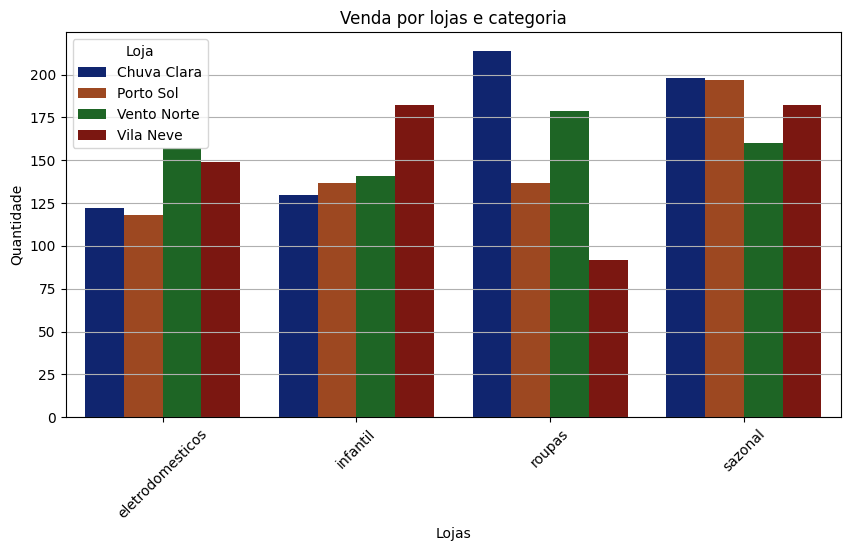

In [22]:
import seaborn as sns
venda_por_produtos = df_analise.groupby(['Loja','Categoria'])['Quantidade'].sum().round().reset_index()

plt.figure(figsize=(10,5))

sns.barplot(data=venda_por_produtos, x='Categoria', y='Quantidade', hue='Loja', palette='dark')

plt.title("Venda por lojas e categoria")
plt.xlabel("Lojas")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()